In [ ]:
import numpy as np

# Needed for plotting
import matplotlib.colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Needed for generating classification, regression and clustering datasets
import sklearn.datasets as dt

# Needed for generating data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

import pandas as pd
import csv
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.metrics import roc_auc_score


In [ ]:
# Fetch the dataset and store in file
file = open("/content/drive/MyDrive/Data Mining/project.data","r")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#read data
data = pd.read_csv(file, sep=',', names=['id number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class'])
data.dtypes

In [ ]:
#Storing the indices of the cells where Bare Nuclei value is missing
store_index = data[data['Bare Nuclei']=='?'].index.values
print(store_index.tolist())

#Dropping the rows of the bare nuclei column that has missing values
data.drop(data.index[store_index], inplace=True)
#data.to_csv('bc.csv')
print(data)

In [ ]:
# Dropping id and setting class variables as 0 and 1 for convenience
data.drop('id number', axis=1, inplace=True)
data["Class"].replace({2:0, 4:1}, inplace=True)
X = data

In [ ]:
# Fit a kernel density model using GridSearchCV to determine the best parameter for bandwidth
bandwidth_params = {'bandwidth': np.arange(0.01,1,0.05)}
grid_search = GridSearchCV(KernelDensity(), bandwidth_params)
grid_search.fit(X)
kde = grid_search.best_estimator_

# Generate/sample n new rows
new_data = kde.sample(1000, random_state=None)
newData = pd.DataFrame(new_data, columns=['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class'])
newData.shape

In [ ]:
#Due to the Kde used the class variable is also estimated based on density . Converting it to int.
newData['Class'] = newData['Class'].astype(int)

#Estimating class variables as 0 and 1 based on even/odd values to suite the binary classifier data
newData['Class'].loc[(newData['Class'] % 2) == 0] = 0
newData['Class'].loc[(newData['Class'] % 2) == 1] = 1

In [ ]:
#Since the distibution is random eliminating negative data poitns by taking absolute value
data = abs(newData)
#data.to_csv('bc.csv')
data.shape

In [ ]:
#Separating the independent and the dependent features

malignancy=data.Class
features=data.drop('Class',axis=1)
features_train,features_test,malignancy_train,malignancy_test=train_test_split(features,malignancy,test_size=0.2)

In [ ]:
#### KNN Classifier ####

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(features_train,malignancy_train)
predicted_score=[]
predicted_score=knn.predict(features_test)
print("Accuracy:",metrics.accuracy_score(malignancy_test, predicted_score))

print("Running Cross validation for KNN")
knn_cv = KNeighborsClassifier(n_neighbors=5)
cv_scores = cross_val_score(knn_cv, features_train, malignancy_train, scoring="f1",cv=10)
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))
print('Confusion Matrix for KNN: ',metrics.confusion_matrix(malignancy_test,predicted_score), sep = '\n')

accuracy_knn = accuracy_score(malignancy_test, predicted_score)
print('Accuracy for KNN: %f' % accuracy_knn)
precision_knn = precision_score(malignancy_test, predicted_score)
print('Precision for KNN: %f' % precision_knn)
recall_knn = recall_score(malignancy_test, predicted_score)
print('Recall for KNN: %f' % recall_knn)
f1_knn = f1_score(malignancy_test, predicted_score)
print('F1 Score for KNN: %f' % f1_knn)

predicted_knn=[None]*len(predicted_score)
for i in range(0, len(predicted_score)):    
    predicted_knn[i] = predicted_score[i]

#print("Elements of new array: ")    
#for i in range(0, len(predicted_knn)):    
#  print(predicted_knn[i])

In [ ]:
metrics.plot_roc_curve(knn, features_test, predicted_score)

In [ ]:
#### Decision Tree Classifier ####

clf = DecisionTreeClassifier()
clf = clf.fit(features_train,malignancy_train)
predicted_score=[]
predicted_score = clf.predict(features_test)
print("Accuracy:",metrics.accuracy_score(malignancy_test, predicted_score))

print("Running Cross validation for Decision Tree")
dt_cv = DecisionTreeClassifier()
cv_scores = cross_val_score(dt_cv, features_train, malignancy_train, scoring="f1",cv=10)
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))
print('Confusion Matrix for Decision Tree: ',metrics.confusion_matrix(malignancy_test,predicted_score), sep = '\n')

accuracy_dt = accuracy_score(malignancy_test, predicted_score)
print('Accuracy for Decision Tree: %f' % accuracy_dt)
precision_dt = precision_score(malignancy_test, predicted_score)
print('Precision for Decision Tree: %f' % precision_dt)
recall_dt = recall_score(malignancy_test, predicted_score)
print('Recall for Decision Tree: %f' % recall_dt)
f1_dt = f1_score(malignancy_test, predicted_score)
print('F1 Score for Decision Tree: %f' % f1_dt)

predicted_dt=[None]*len(predicted_score)
for i in range(0, len(predicted_score)):    
    predicted_dt[i] = predicted_score[i]

#print("Elements of new array: ")    
#for i in range(0, len(predicted_dt)):    
#  print(predicted_dt[i])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


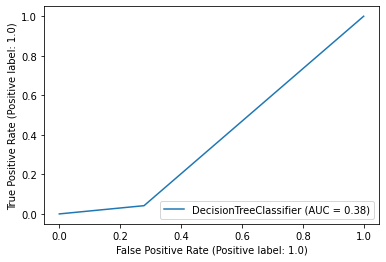

In [ ]:
metrics.plot_roc_curve(clf, features_test, predicted_score)

In [ ]:
#### Random Forest Classifier ####

rf=RandomForestClassifier(n_estimators=100)
rf = rf.fit(features_train,malignancy_train)
predicted_score=[]
predicted_score = rf.predict(features_test)
print("Accuracy:",metrics.accuracy_score(malignancy_test, predicted_score))

print("Running Cross validation for Random Forest")
rf_cv = RandomForestClassifier(n_estimators=100)
cv_scores = cross_val_score(rf_cv, features_train, malignancy_train, scoring="f1",cv=10)
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))
print('Confusion Matrix for Random Forest: ',metrics.confusion_matrix(malignancy_test,predicted_score), sep = '\n')

accuracy_rf = accuracy_score(malignancy_test, predicted_score)
print('Accuracy for Random Forest: %f' % accuracy_rf)
precision_rf = precision_score(malignancy_test, predicted_score)
print('Precision for Random Forest: %f' % precision_rf)
recall_rf = recall_score(malignancy_test, predicted_score)
print('Recall for Random Forest: %f' % recall_rf)
f1_rf = f1_score(malignancy_test, predicted_score)
print('F1 Score for Random Forest: %f' % f1_rf)

predicted_rf=[None]*len(predicted_score)
for i in range(0, len(predicted_score)):    
    predicted_rf[i] = predicted_score[i]

#print("Elements of new array: ")    
#for i in range(0, len(predicted_rf)):    
#  print(predicted_rf[i])


Accuracy: 0.65
Running Cross validation for Random Forest
[0.07407407 0.20689655 0.33333333 0.07142857 0.         0.
 0.         0.07142857 0.         0.07407407]
cv_scores mean:0.08312351760627622
Confusion Matrix for Random Forest: 
[[126  12]
 [ 58   4]]
Accuracy for Random Forest: 0.650000
Precision for Random Forest: 0.250000
Recall for Random Forest: 0.064516
F1 Score for Random Forest: 0.102564


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


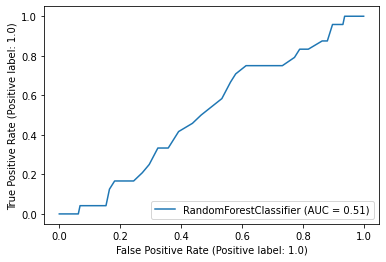

In [ ]:
metrics.plot_roc_curve(rf, features_test, predicted_score)

In [ ]:

### Naive Bayes Classifier ###

nb = MultinomialNB()
nb = nb.fit(features_train, malignancy_train)
predicted_score=[]
predicted_score = nb.predict(features_test)
print("Accuracy:",metrics.accuracy_score(malignancy_test, predicted_score))
print("Running Cross validation for Naive Bayes Classifier")
nb_cv = MultinomialNB()
cv_scores = cross_val_score(nb_cv, features_train, malignancy_train, scoring="f1",cv=10)
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))
print('Confusion Matrix for Naive Bayes: ',metrics.confusion_matrix(malignancy_test,predicted_score), sep = '\n')

accuracy_nb = accuracy_score(malignancy_test, predicted_score)
print('Accuracy for Naive Bayes: %f' % accuracy_nb)
precision_nb = precision_score(malignancy_test, predicted_score)
print('Precision for Naive Bayes: %f' % precision_nb)
recall_nb = recall_score(malignancy_test, predicted_score)
print('Recall for Naive Bayes: %f' % recall_nb)
f1_nb = f1_score(malignancy_test, predicted_score)
print('F1 Score for Naive Bayes: %f' % f1_nb)

predicted_nb=[None]*len(predicted_score)
for i in range(0, len(predicted_score)):    
    predicted_nb[i] = predicted_score[i]

#print("Elements of new array: ")    
#for i in range(0, len(predicted_nb)):    
#  print(predicted_nb[i])


Accuracy: 0.66
Running Cross validation for Naive Bayes Classifier
[0.07142857 0.08       0.14285714 0.07692308 0.         0.22222222
 0.         0.         0.         0.        ]
cv_scores mean:0.059343101343101334
Confusion Matrix for Naive Bayes: 
[[131   7]
 [ 61   1]]
Accuracy for Naive Bayes: 0.660000
Precision for Naive Bayes: 0.125000
Recall for Naive Bayes: 0.016129
F1 Score for Naive Bayes: 0.028571


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


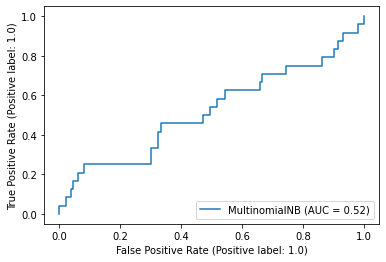

In [ ]:
metrics.plot_roc_curve(nb, features_test, predicted_score)

In [ ]:

### SVM Classifier ###

sm = svm.SVC(kernel='linear')
sm.fit(features_train, malignancy_train)
predicted_score=[]
predicted_score = sm.predict(features_test)
print("Accuracy:",metrics.accuracy_score(malignancy_test, predicted_score))
print("Running Cross validation for Support Vector Machine Classifier")
sm_cv = MultinomialNB()
cv_scores = cross_val_score(sm_cv, features_train, malignancy_train, scoring="f1",cv=10)
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))
print('Confusion Matrix for Support Vector Machine: ',metrics.confusion_matrix(malignancy_test,predicted_score), sep = '\n')

accuracy_sm = accuracy_score(malignancy_test, predicted_score)
print('Accuracy for Support Vector Machine: %f' % accuracy_sm)
precision_sm = precision_score(malignancy_test, predicted_score)
print('Precision for Support Vector Machine: %f' % precision_sm)
recall_sm = recall_score(malignancy_test, predicted_score)
print('Recall for Support Vector Machine: %f' % recall_sm)
f1_sm = f1_score(malignancy_test, predicted_score)
print('F1 Score for Support Vector Machine: %f' % f1_sm)



Accuracy: 0.69
Running Cross validation for Support Vector Machine Classifier
[0.07142857 0.08       0.14285714 0.07692308 0.         0.22222222
 0.         0.         0.         0.        ]
cv_scores mean:0.059343101343101334
Confusion Matrix for Support Vector Machine: 
[[138   0]
 [ 62   0]]
Accuracy for Support Vector Machine: 0.690000
Precision for Support Vector Machine: 0.000000
Recall for Support Vector Machine: 0.000000
F1 Score for Support Vector Machine: 0.000000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


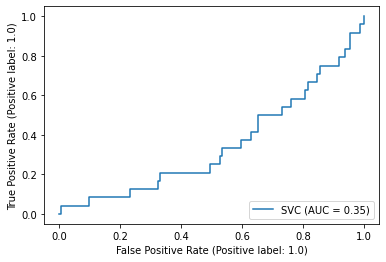

In [ ]:
metrics.plot_roc_curve(sm, features_test, predicted_score)

In [ ]:
predicted_sm=[None]*len(predicted_score)
for i in range(0, len(predicted_score)):    
    predicted_sm[i] = predicted_score[i]

#print("Elements of new array: ")    
#for i in range(0, len(predicted_sm)):    
#  print(predicted_sm[i])

#Adding all the prediction arrays and multiplying them with the weight of the models 
#wt_knn is the weighted prediction of knn

wt_knn = [x*5 for x in predicted_knn]
wt_rf  = [x*4 for x in predicted_rf]
wt_dt  = [x*3 for x in predicted_dt]
wt_nb  = [x*2 for x in predicted_nb]
wt_sm  = [x*1 for x in predicted_sm]

#Adding the elements of all the arrays and storing in grand_sum
grand_sum = []
for (x1,x2,x3,x4,x5) in zip(wt_knn, wt_rf, wt_dt, wt_nb, wt_sm):
    grand_sum.append(x1+x2+x3+x4+x5)

print(grand_sum)

#Finding the predictions of the meta model
pred_meta=[]
for x in grand_sum:
  if (x>=6):#Setting a threshold here (6=1+5 or 2+4 or 1+2+3. It means any of these combinations of the models can be chosen)
    pred_meta.append(1)
  else:
    pred_meta.append(0)

print(pred_meta) 

print('Confusion Matrix for Meta Learning Model: ',metrics.confusion_matrix(malignancy_test,pred_meta), sep = '\n')
accuracy_ml = accuracy_score(malignancy_test, pred_meta)
print('Accuracy for Meta Learning Model: %f' % accuracy_ml)
precision_ml = precision_score(malignancy_test, pred_meta)
print('Precision for Meta Learning Model: %f' % precision_ml)
recall_ml = recall_score(malignancy_test, pred_meta)
print('Recall for Meta Learning Model: %f' % recall_ml)
f1_ml = f1_score(malignancy_test, pred_meta)
print('F1 Score for Meta Learning Model: %f' % f1_ml)

[0.0, 0.0, 0.0, 3.0, 3.0, 0.0, 0.0, 9.0, 0.0, 3.0, 3.0, 3.0, 0.0, 2.0, 12.0, 3.0, 0.0, 5.0, 0.0, 3.0, 0.0, 2.0, 0.0, 3.0, 12.0, 5.0, 7.0, 3.0, 0.0, 0.0, 3.0, 9.0, 5.0, 0.0, 0.0, 5.0, 0.0, 0.0, 8.0, 0.0, 0.0, 12.0, 0.0, 0.0, 0.0, 12.0, 0.0, 2.0, 0.0, 0.0, 4.0, 3.0, 0.0, 3.0, 4.0, 3.0, 0.0, 0.0, 0.0, 7.0, 0.0, 0.0, 0.0, 2.0, 3.0, 5.0, 3.0, 12.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 3.0, 3.0, 5.0, 0.0, 5.0, 0.0, 0.0, 0.0, 3.0, 0.0, 12.0, 0.0, 0.0, 5.0, 5.0, 8.0, 0.0, 3.0, 3.0, 3.0, 8.0, 0.0, 3.0, 3.0, 0.0, 0.0, 0.0, 5.0, 5.0, 0.0, 0.0, 3.0, 5.0, 0.0, 3.0, 8.0, 3.0, 0.0, 0.0, 9.0, 0.0, 0.0, 0.0, 0.0, 8.0, 0.0, 5.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 5.0, 0.0, 3.0, 0.0, 5.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 3.0, 8.0, 2.0, 0.0, 0.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 5.0, 0.0, 3.0, 0.0, 0.0, 3.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 12.0, 0.0, 5.0, 5.0, 5.0, 3.0, 0.0, 5.0, 0.0, 0.0, 0.0, 7.0, 8.0, 0.0, 3.0, 8.0, 4.0, 0.